# MatTranspose

In [1]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import re
from unum import Unum
# data
from data.data import *
from data.cluster_data import *

# setup
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
})
# sns.set_theme(style="ticks", palette="Set2")
# Read the data
raw_data_o0_np4: pd.DataFrame = data.parse_data('../reports/base_np4.txt')
raw_data_o0_np16: pd.DataFrame = data.parse_data('../reports/base_np16.txt')
raw_data_o0_np64: pd.DataFrame = data.parse_data('../reports/base_np64.txt')
raw_data_o1_np4: pd.DataFrame = data.parse_data('../reports/opt_o1_np4.txt')
raw_data_o1_np16: pd.DataFrame = data.parse_data('../reports/opt_o1_np16.txt')
raw_data_o1_np64: pd.DataFrame = data.parse_data('../reports/opt_o1_np64.txt')
raw_data_o2_np4: pd.DataFrame = data.parse_data('../reports/opt_o2_np4.txt')
raw_data_o2_np16: pd.DataFrame = data.parse_data('../reports/opt_o2_np16.txt')
raw_data_o2_np64: pd.DataFrame = data.parse_data('../reports/opt_o2_np64.txt')
raw_data_o3_np4: pd.DataFrame = data.parse_data('../reports/opt_o3_np4.txt')
raw_data_o3_np16: pd.DataFrame = data.parse_data('../reports/opt_o3_np16.txt')
raw_data_o3_np64: pd.DataFrame = data.parse_data('../reports/opt_o3_np64.txt')
checkSymm = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTranspose'])].copy()
checkSymm.name = 'matTransposeMPI'
checkSymm['np'] = '1'
checkSymm['bandwidth'] = checkSymm.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

# matTranspose

In [2]:
checkSymm_base_o0_np4 = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np16 = raw_data_o0_np16.loc[raw_data_o0_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np64 = raw_data_o0_np64.loc[raw_data_o0_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np4['np'] = '4'
checkSymm_base_o0_np16['np'] = '16'
checkSymm_base_o0_np64['np'] = '64'

checkSymm_base_o1_np4 = raw_data_o1_np4.loc[raw_data_o1_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np16 = raw_data_o1_np16.loc[raw_data_o1_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np64 = raw_data_o1_np64.loc[raw_data_o1_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np4['np'] = '4'
checkSymm_base_o1_np16['np'] = '16'
checkSymm_base_o1_np64['np'] = '64'

checkSymm_base_o2_np4 = raw_data_o2_np4.loc[raw_data_o2_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np16 = raw_data_o2_np16.loc[raw_data_o2_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np64 = raw_data_o2_np64.loc[raw_data_o2_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np4['np'] = '4'
checkSymm_base_o2_np16['np'] = '16'
checkSymm_base_o2_np64['np'] = '64'

checkSymm_base_o3_np4 = raw_data_o3_np4.loc[raw_data_o3_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np16 = raw_data_o3_np16.loc[raw_data_o3_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np64 = raw_data_o3_np64.loc[raw_data_o3_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np4['np'] = '4'
checkSymm_base_o3_np16['np'] = '16'
checkSymm_base_o3_np64['np'] = '64'

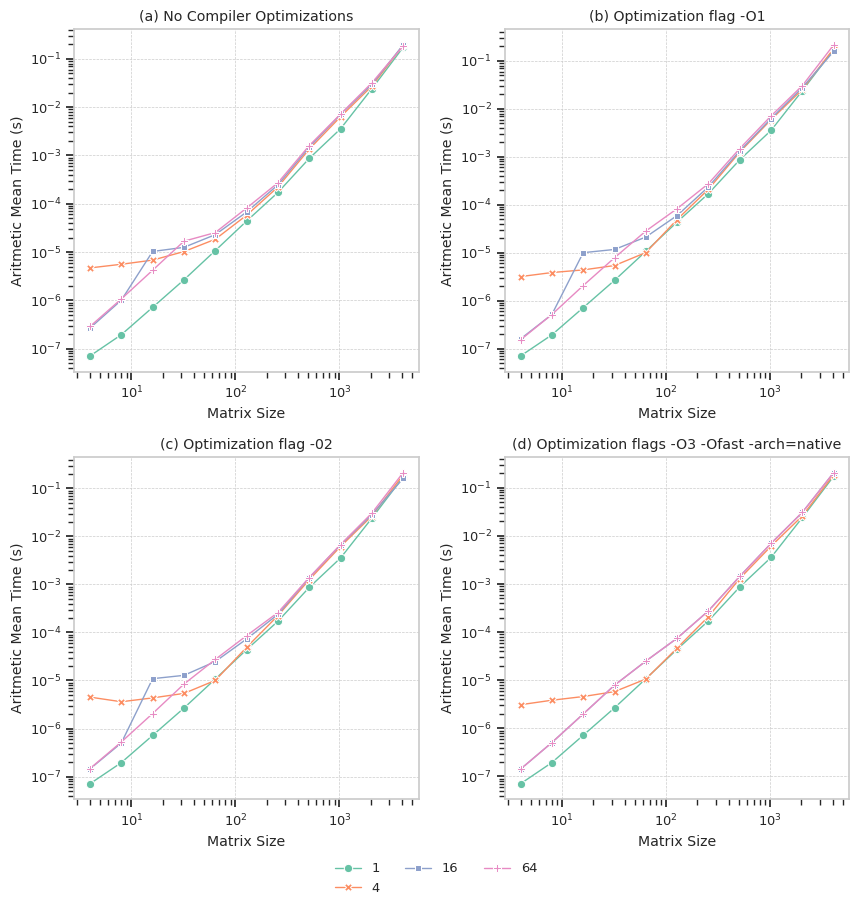

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('(a) No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('(b) Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('(c) Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('(d) Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Aritmetic Mean Time (s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/matTransposeMPI_base.svg", format='svg', bbox_inches='tight') 

## With bandwidth

In [4]:
checkSymm_base_o0_np4['bandwidth'] = checkSymm_base_o0_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o0_np16['bandwidth'] = checkSymm_base_o0_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o0_np64['bandwidth'] = checkSymm_base_o0_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o1_np4['bandwidth'] = checkSymm_base_o1_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o1_np16['bandwidth'] = checkSymm_base_o1_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o1_np64['bandwidth'] = checkSymm_base_o1_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o2_np4['bandwidth'] = checkSymm_base_o2_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o2_np16['bandwidth'] = checkSymm_base_o2_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o2_np64['bandwidth'] = checkSymm_base_o2_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o3_np4['bandwidth'] = checkSymm_base_o3_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o3_np16['bandwidth'] = checkSymm_base_o3_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o3_np64['bandwidth'] = checkSymm_base_o3_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

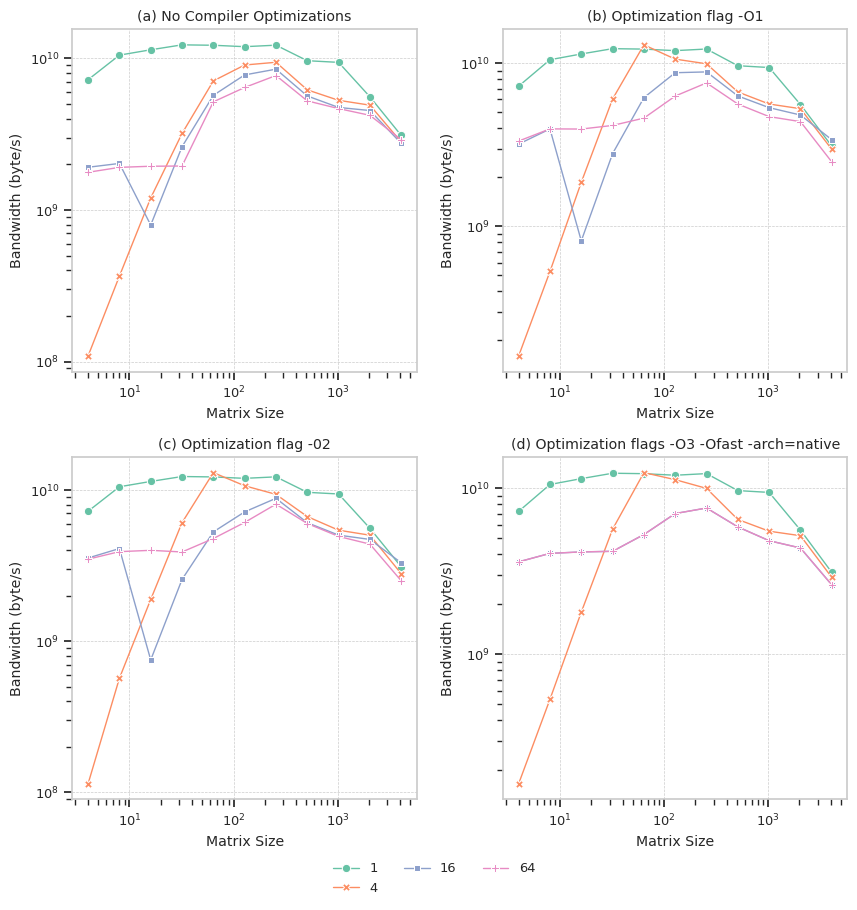

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('(a) No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Bandwidth (byte/s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('(b) Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Bandwidth (byte/s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('(c) Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Bandwidth (byte/s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('(d) Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Bandwidth (byte/s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/matTransposeMPI_bandwidth.svg", format='svg', bbox_inches='tight') 

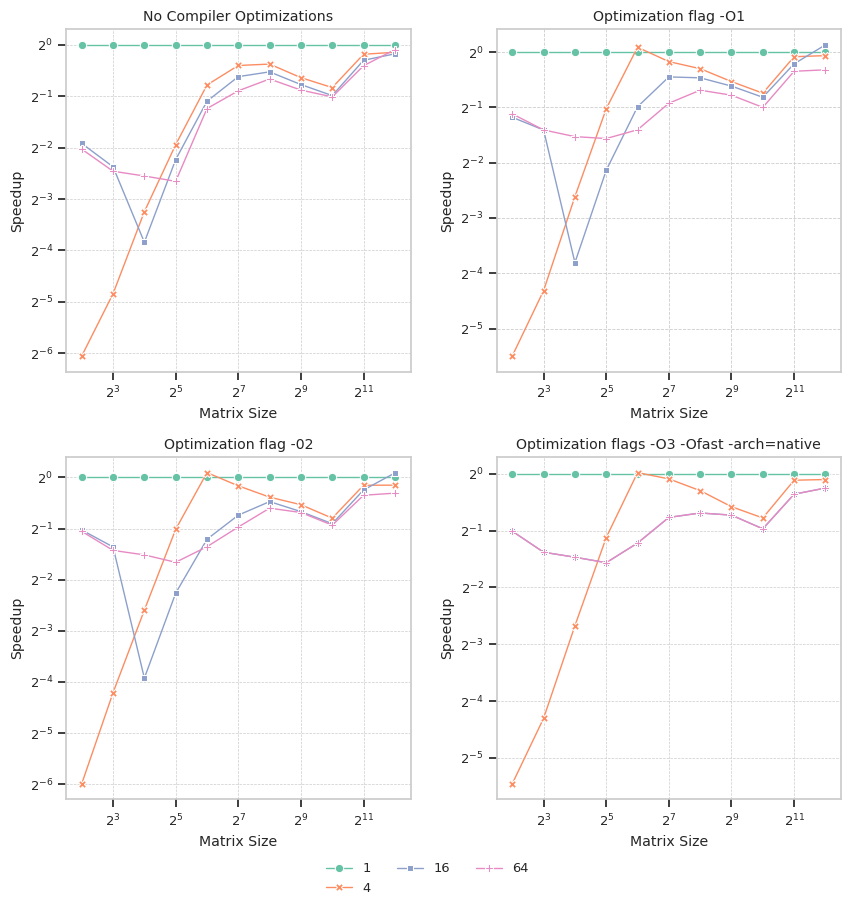

In [6]:
checkSymm['speedup'] = checkSymm.apply(lambda row: 1, axis=1).copy()
checkSymm_base_o0_np4['speedup'] = checkSymm_base_o0_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o0_np16['speedup'] = checkSymm_base_o0_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o0_np64['speedup'] = checkSymm_base_o0_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()


checkSymm_base_o1_np4['speedup'] = checkSymm_base_o1_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o1_np16['speedup'] = checkSymm_base_o1_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o1_np64['speedup'] = checkSymm_base_o1_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

checkSymm_base_o2_np4['speedup'] = checkSymm_base_o2_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o2_np16['speedup'] = checkSymm_base_o2_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o2_np64['speedup'] = checkSymm_base_o2_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

checkSymm_base_o3_np4['speedup'] = checkSymm_base_o3_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o3_np16['speedup'] = checkSymm_base_o3_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o3_np64['speedup'] = checkSymm_base_o3_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64 ]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

# axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log', base=2)
axes[0][0].set_yscale('log', base=2)
axes[0][0].set_title('No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Speedup')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
# axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log', base=2)
axes[0][1].set_yscale('log', base=2)
axes[0][1].set_title('Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Speedup')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.6)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
# axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log', base=2)
axes[1][0].set_yscale('log', base=2)
axes[1][0].set_title('Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Speedup')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
# axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log', base=2)
axes[1][1].set_yscale('log', base=2)
axes[1][1].set_title('Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Speedup')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show
fig.savefig("../images/matTransposeMPI_speedup.svg", format='svg', bbox_inches='tight') 

## Weak Scaling

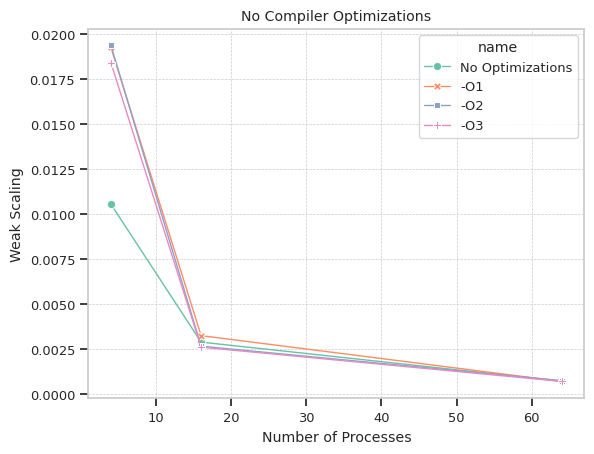

In [7]:
mean_base = checkSymm.loc[checkSymm.space == 8, 'mean'].iloc[0]
#mean_base = checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == 16, 'mean'].iloc[0]
space = [64, 128, 256]
checkSymm_speedup_o0 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o0_np16.loc[checkSymm_base_o0_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o0_np64.loc[checkSymm_base_o0_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["No Optimizations", "No Optimizations", "No Optimizations"]
})
checkSymm_speedup_o0['name'] = checkSymm_speedup_o0['name'].astype(str)
checkSymm_speedup_o0['weak_scaling'] = checkSymm_speedup_o0.apply(lambda row: mean_base / row['mean'], axis=1).copy()
#print(checkSymm_speedup_o0)

checkSymm_speedup_o1 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o1_np4.loc[checkSymm_base_o1_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o1_np16.loc[checkSymm_base_o1_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o1_np64.loc[checkSymm_base_o1_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O1", "-O1", "-O1"]
})
checkSymm_speedup_o1['name'] = checkSymm_speedup_o1['name'].astype(str)
checkSymm_speedup_o1['weak_scaling'] = checkSymm_speedup_o1.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o2 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o2_np4.loc[checkSymm_base_o2_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o2_np16.loc[checkSymm_base_o2_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o2_np64.loc[checkSymm_base_o2_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O2", "-O2", "-O2"]
})
checkSymm_speedup_o2['name'] = checkSymm_speedup_o2['name'].astype(str)
checkSymm_speedup_o2['weak_scaling'] = checkSymm_speedup_o2.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o3 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o3_np4.loc[checkSymm_base_o3_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o3_np16.loc[checkSymm_base_o3_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o3_np64.loc[checkSymm_base_o3_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O3", "-O3", "-O3"]
})
checkSymm_speedup_o3['name'] = checkSymm_speedup_o3['name'].astype(str)
checkSymm_speedup_o3['weak_scaling'] = checkSymm_speedup_o3.apply(lambda row: mean_base / row['mean'], axis=1).copy()

lp = sns.lineplot(
    data=pd.concat([checkSymm_speedup_o0, checkSymm_speedup_o1, checkSymm_speedup_o2, checkSymm_speedup_o3]),
    x="np", y="weak_scaling", hue="name", style="name",
    markers=True, dashes=False,
    linewidth = 1
)

lp.set_title('No Compiler Optimizations')
lp.set_xlabel('Number of Processes')
lp.set_ylabel('Weak Scaling')
lp.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()
fis = lp.get_figure()
fig.savefig("../images/matTransposeMPI_weak_scaling.svg", format='svg') 

# matTransposeBlock

In [8]:
checkSymm_base_o0_np4 = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o0_np16 = raw_data_o0_np16.loc[raw_data_o0_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o0_np64 = raw_data_o0_np64.loc[raw_data_o0_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o0_np4['np'] = '4'
checkSymm_base_o0_np16['np'] = '16'
checkSymm_base_o0_np64['np'] = '64'

checkSymm_base_o1_np4 = raw_data_o1_np4.loc[raw_data_o1_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o1_np16 = raw_data_o1_np16.loc[raw_data_o1_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o1_np64 = raw_data_o1_np64.loc[raw_data_o1_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o1_np4['np'] = '4'
checkSymm_base_o1_np16['np'] = '16'
checkSymm_base_o1_np64['np'] = '64'

checkSymm_base_o2_np4 = raw_data_o2_np4.loc[raw_data_o2_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o2_np16 = raw_data_o2_np16.loc[raw_data_o2_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o2_np64 = raw_data_o2_np64.loc[raw_data_o2_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o2_np4['np'] = '4'
checkSymm_base_o2_np16['np'] = '16'
checkSymm_base_o2_np64['np'] = '64'

checkSymm_base_o3_np4 = raw_data_o3_np4.loc[raw_data_o3_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o3_np16 = raw_data_o3_np16.loc[raw_data_o3_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o3_np64 = raw_data_o3_np64.loc[raw_data_o3_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_base_o3_np4['np'] = '4'
checkSymm_base_o3_np16['np'] = '16'
checkSymm_base_o3_np64['np'] = '64'

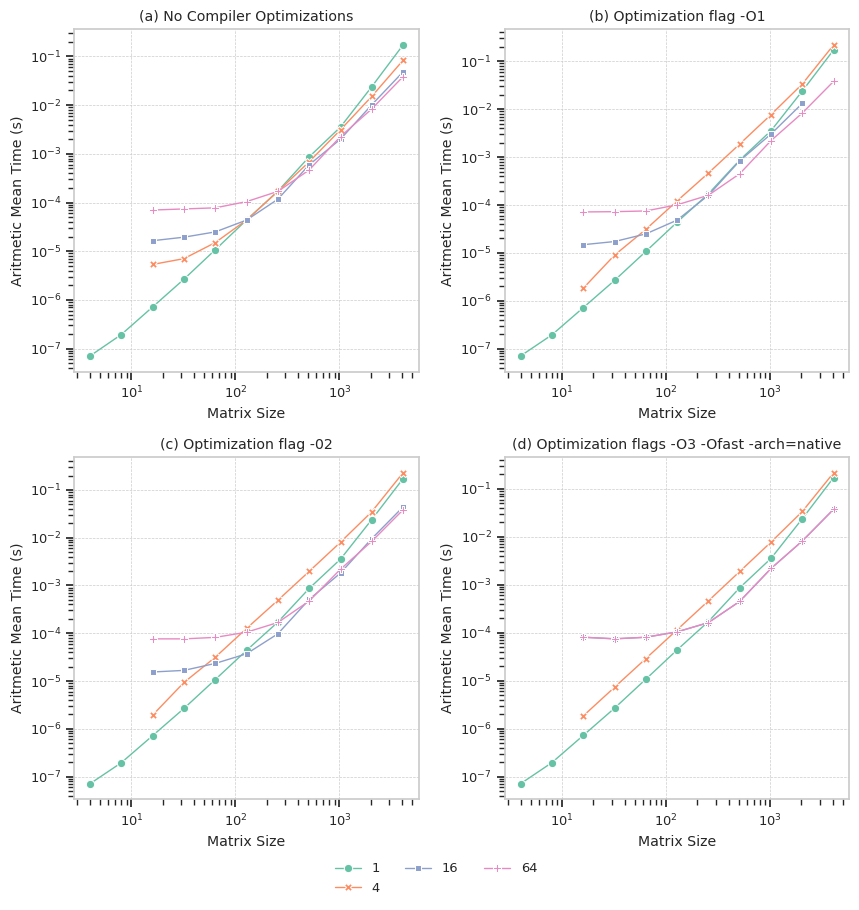

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('(a) No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('(b) Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('(c) Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="mean", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('(d) Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Aritmetic Mean Time (s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/matTransposeMPI_block_base.svg", format='svg', bbox_inches='tight') 

## Bandwidth

In [10]:
checkSymm_base_o0_np4['bandwidth'] = checkSymm_base_o0_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o0_np16['bandwidth'] = checkSymm_base_o0_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o0_np64['bandwidth'] = checkSymm_base_o0_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o1_np4['bandwidth'] = checkSymm_base_o1_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o1_np16['bandwidth'] = checkSymm_base_o1_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o1_np64['bandwidth'] = checkSymm_base_o1_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o2_np4['bandwidth'] = checkSymm_base_o2_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o2_np16['bandwidth'] = checkSymm_base_o2_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o2_np64['bandwidth'] = checkSymm_base_o2_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

checkSymm_base_o3_np4['bandwidth'] = checkSymm_base_o3_np4.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o3_np16['bandwidth'] = checkSymm_base_o3_np16.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)
checkSymm_base_o3_np64['bandwidth'] = checkSymm_base_o3_np64.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

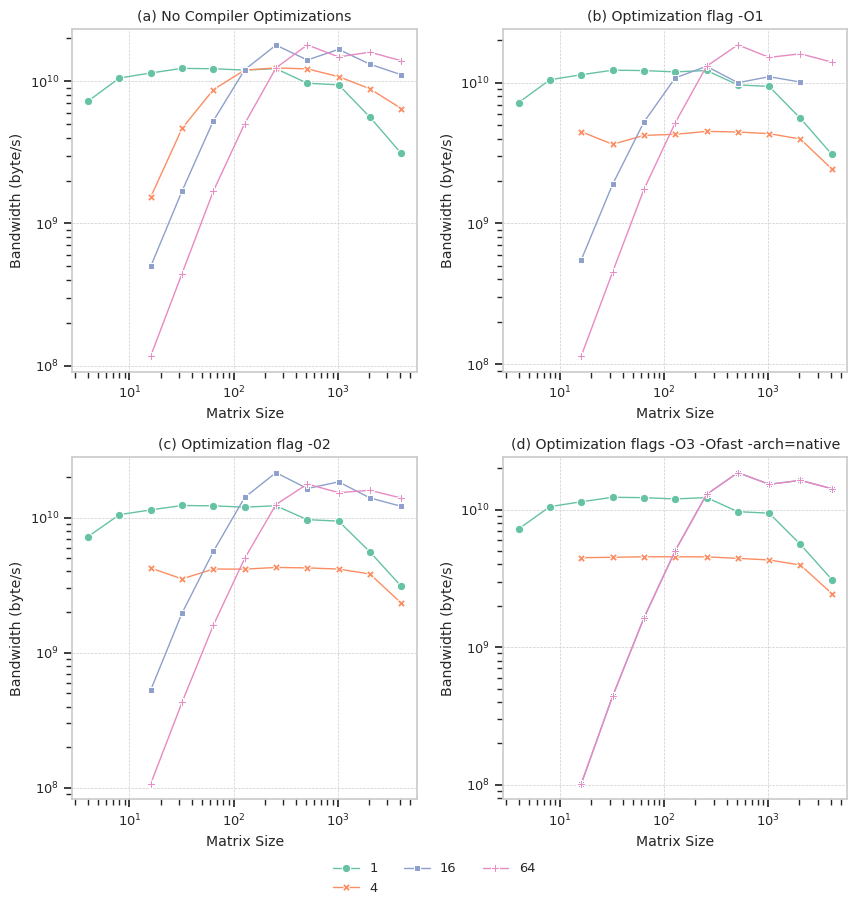

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('(a) No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Bandwidth (byte/s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('(b) Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Bandwidth (byte/s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('(c) Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Bandwidth (byte/s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="bandwidth", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('(d) Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Bandwidth (byte/s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/matTransposeMPI_block_bandwidth.svg", format='svg', bbox_inches='tight') 

## Strong Scaling

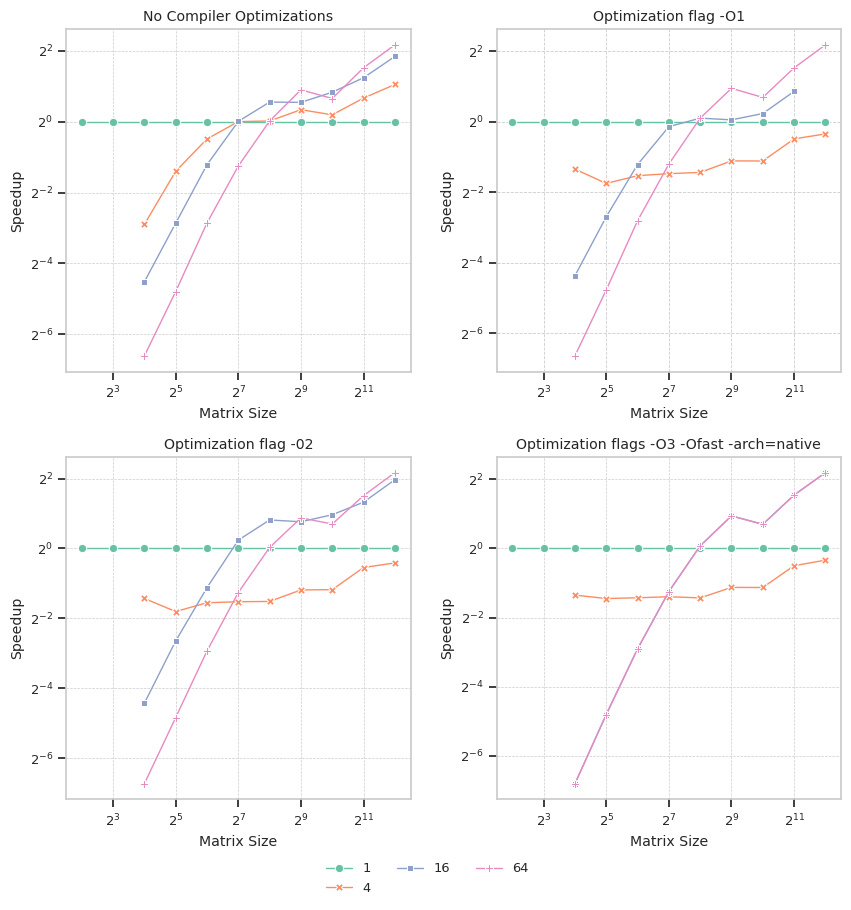

In [16]:
checkSymm['speedup'] = checkSymm.apply(lambda row: 1, axis=1).copy()
checkSymm_base_o0_np4['speedup'] = checkSymm_base_o0_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o0_np16['speedup'] = checkSymm_base_o0_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o0_np64['speedup'] = checkSymm_base_o0_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()


checkSymm_base_o1_np4['speedup'] = checkSymm_base_o1_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o1_np16['speedup'] = checkSymm_base_o1_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o1_np64['speedup'] = checkSymm_base_o1_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

checkSymm_base_o2_np4['speedup'] = checkSymm_base_o2_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o2_np16['speedup'] = checkSymm_base_o2_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o2_np64['speedup'] = checkSymm_base_o2_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

checkSymm_base_o3_np4['speedup'] = checkSymm_base_o3_np4.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o3_np16['speedup'] = checkSymm_base_o3_np16.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()
checkSymm_base_o3_np64['speedup'] = checkSymm_base_o3_np64.apply(lambda row: 1 / (row['mean'] / checkSymm.loc[checkSymm.space == row.space, 'mean'].iloc[0]), axis=1).copy()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o0_np4, checkSymm_base_o0_np16, checkSymm_base_o0_np64 ]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

# axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log', base=2)
axes[0][0].set_yscale('log', base=2)
axes[0][0].set_title('No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Speedup')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o1_np4, checkSymm_base_o1_np16, checkSymm_base_o1_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
# axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log', base=2)
axes[0][1].set_yscale('log', base=2)
axes[0][1].set_title('Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Speedup')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.6)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o2_np4, checkSymm_base_o2_np16, checkSymm_base_o2_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
# axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log', base=2)
axes[1][0].set_yscale('log', base=2)
axes[1][0].set_title('Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Speedup')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_base_o3_np4, checkSymm_base_o3_np16, checkSymm_base_o3_np64]),
    x="space", y="speedup", hue="np", style="np",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
# axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log', base=2)
axes[1][1].set_yscale('log', base=2)
axes[1][1].set_title('Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Speedup')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show
fig.savefig("../images/matTransposeMPI_block_speedup.svg", format='svg', bbox_inches='tight') 

## Weak Scaling

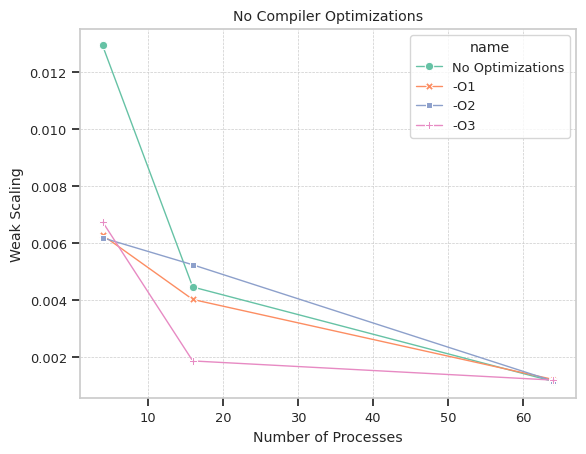

In [13]:
mean_base = checkSymm.loc[checkSymm.space == 8, 'mean'].iloc[0]
#mean_base = checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == 16, 'mean'].iloc[0]
space = [64, 128, 256]
checkSymm_speedup_o0 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o0_np16.loc[checkSymm_base_o0_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o0_np64.loc[checkSymm_base_o0_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["No Optimizations", "No Optimizations", "No Optimizations"]
})
checkSymm_speedup_o0['name'] = checkSymm_speedup_o0['name'].astype(str)
checkSymm_speedup_o0['weak_scaling'] = checkSymm_speedup_o0.apply(lambda row: mean_base / row['mean'], axis=1).copy()
#print(checkSymm_speedup_o0)

checkSymm_speedup_o1 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o1_np4.loc[checkSymm_base_o1_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o1_np16.loc[checkSymm_base_o1_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o1_np64.loc[checkSymm_base_o1_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O1", "-O1", "-O1"]
})
checkSymm_speedup_o1['name'] = checkSymm_speedup_o1['name'].astype(str)
checkSymm_speedup_o1['weak_scaling'] = checkSymm_speedup_o1.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o2 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o2_np4.loc[checkSymm_base_o2_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o2_np16.loc[checkSymm_base_o2_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o2_np64.loc[checkSymm_base_o2_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O2", "-O2", "-O2"]
})
checkSymm_speedup_o2['name'] = checkSymm_speedup_o2['name'].astype(str)
checkSymm_speedup_o2['weak_scaling'] = checkSymm_speedup_o2.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o3 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o3_np4.loc[checkSymm_base_o3_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o3_np16.loc[checkSymm_base_o3_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o3_np64.loc[checkSymm_base_o3_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["-O3", "-O3", "-O3"]
})
checkSymm_speedup_o3['name'] = checkSymm_speedup_o3['name'].astype(str)
checkSymm_speedup_o3['weak_scaling'] = checkSymm_speedup_o3.apply(lambda row: mean_base / row['mean'], axis=1).copy()

lp = sns.lineplot(
    data=pd.concat([checkSymm_speedup_o0, checkSymm_speedup_o1, checkSymm_speedup_o2, checkSymm_speedup_o3]),
    x="np", y="weak_scaling", hue="name", style="name",
    markers=True, dashes=False,
    linewidth = 1
)

lp.set_title('No Compiler Optimizations')
lp.set_xlabel('Number of Processes')
lp.set_ylabel('Weak Scaling')
lp.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()
fig = lp.get_figure()
fig.savefig("../images/matTransposeMPI_block_weak_scaling.svg", format='svg') 

---